In [35]:
# day15
# 1. kaggle bike sharing csv

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='paper', spines=True, 
             ticks=True, grid=True, gridlines='dotted', figsize=(6,4.5))

In [342]:
train=pd.read_csv('data/data/bike/bike-sharing-demand/train.csv', parse_dates=['datetime'])
train
temp=train.head()
# casual : 비회원 주문 
# registered : 회원 주문 
type(train)

pandas.core.frame.DataFrame

In [343]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [344]:
# 분류 / 회기 => 회귀 => 자전거 대여량 예측문제 
train.shape

(10886, 12)

In [345]:
train.temp

0         9.84
1         9.02
2         9.02
3         9.84
4         9.84
5         9.84
6         9.02
7         8.20
8         9.84
9        13.12
10       15.58
11       14.76
12       17.22
13       18.86
14       18.86
15       18.04
16       17.22
17       18.04
18       17.22
19       17.22
20       16.40
21       16.40
22       16.40
23       18.86
24       18.86
25       18.04
26       17.22
27       18.86
28       18.86
29       17.22
         ...  
10856    15.58
10857    15.58
10858    14.76
10859    14.76
10860    13.94
10861    13.94
10862    12.30
10863    12.30
10864    11.48
10865    10.66
10866     9.84
10867    10.66
10868     9.84
10869    10.66
10870     9.84
10871    11.48
10872    13.12
10873    16.40
10874    16.40
10875    17.22
10876    17.22
10877    17.22
10878    17.22
10879    16.40
10880    15.58
10881    15.58
10882    14.76
10883    13.94
10884    13.94
10885    13.12
Name: temp, Length: 10886, dtype: float64

In [269]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

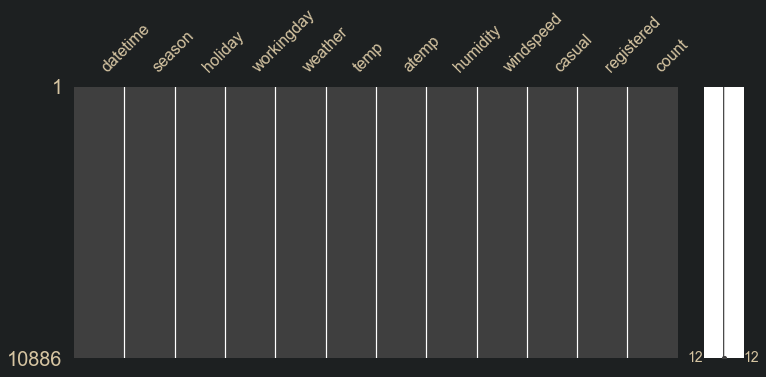

In [270]:
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [271]:
train.datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
5       2011-01-01 05:00:00
6       2011-01-01 06:00:00
7       2011-01-01 07:00:00
8       2011-01-01 08:00:00
9       2011-01-01 09:00:00
10      2011-01-01 10:00:00
11      2011-01-01 11:00:00
12      2011-01-01 12:00:00
13      2011-01-01 13:00:00
14      2011-01-01 14:00:00
15      2011-01-01 15:00:00
16      2011-01-01 16:00:00
17      2011-01-01 17:00:00
18      2011-01-01 18:00:00
19      2011-01-01 19:00:00
20      2011-01-01 20:00:00
21      2011-01-01 21:00:00
22      2011-01-01 22:00:00
23      2011-01-01 23:00:00
24      2011-01-02 00:00:00
25      2011-01-02 01:00:00
26      2011-01-02 02:00:00
27      2011-01-02 03:00:00
28      2011-01-02 04:00:00
29      2011-01-02 06:00:00
                ...        
10856   2012-12-18 18:00:00
10857   2012-12-18 19:00:00
10858   2012-12-18 20:00:00
10859   2012-12-18 21:00:00
10860   2012-12-18 2

In [272]:
# 연별 -> 월별 -> 일별(<요일별 // 시간대별 (시 데이터만 추출) counting 
train['year']=train['datetime'].dt.year # .dt 상수 ( datetime API 방문 요망)
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 1.0, 'lending quantity by hour')]

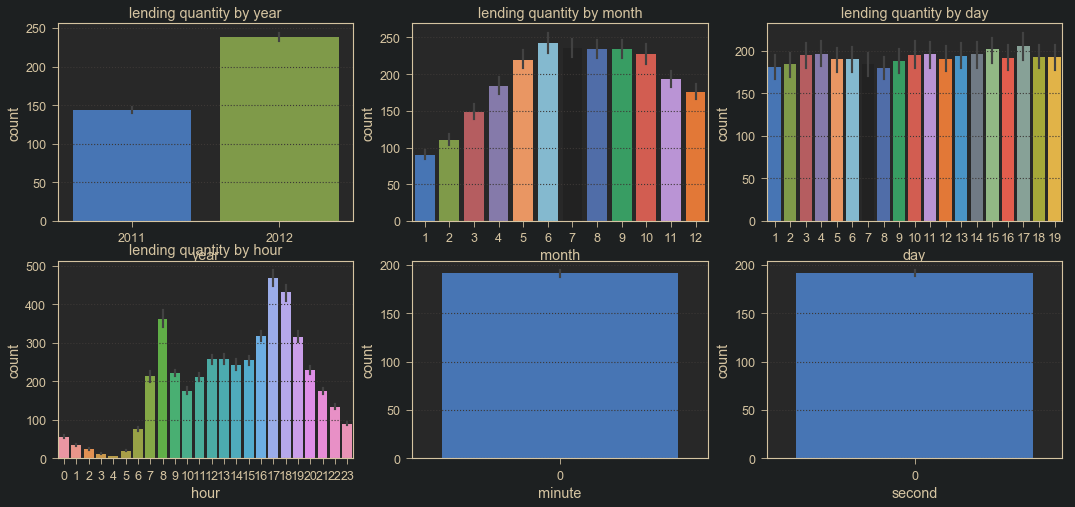

In [273]:
# subplot : 행 열 개수 창 나눠 
# 도화지 figure 
# 창 하나 하나 axis 
# x 축하나 axes
# y 축하나 axes

# EDA ( 탐색적 분석 방법 )

# figure 2행 3열 분리 
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(18,8)
# 오차 허용범위 pvalue 유의성 겁사 흔적 
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2) # 순수한 월에 대한 평균 도출값
# 연도에 따라 구분되어진 월별 추출이 아님
sns.barplot(data=train, x='day', y='count', ax=ax3)
# 휴일에 따른 일별 분류인지 
# 근무일 에 따른 일별 분류인지 확인 
sns.barplot(data=train, x='hour', y='count', ax=ax4)
# 총체적으로 데이터 도식화를 통해 분석 줄기잡기
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(title='lending quantity by year')
ax2.set(title='lending quantity by month')
ax3.set(title='lending quantity by day')
ax4.set(title='lending quantity by hour')




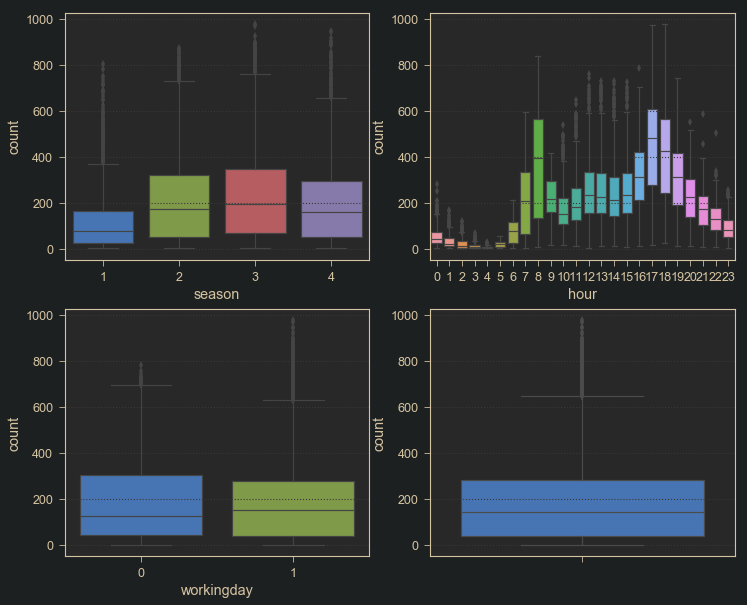

In [274]:
fig, axes=plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train, x='season', y='count', orient='v', ax=axes[0][0])

# 계절별 카운트 수 출력 
sns.boxplot(data=train, x='hour', y='count', orient='v', ax=axes[0][1])
sns.boxplot(data=train, x='workingday', y='count', orient='v', ax=axes[1][0])
sns.boxplot(data=train, y='count', orient='v', ax=axes[1][1])

In [275]:
train['dayofweek']=train['datetime'].dt.dayofweek 
train['dayofweek']
# 요일별 추출
# 0 : 월요일 ~ 6 : 일요일

# train=train.drop(['datofweek'],axis=1)
train.columns


# type(train)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

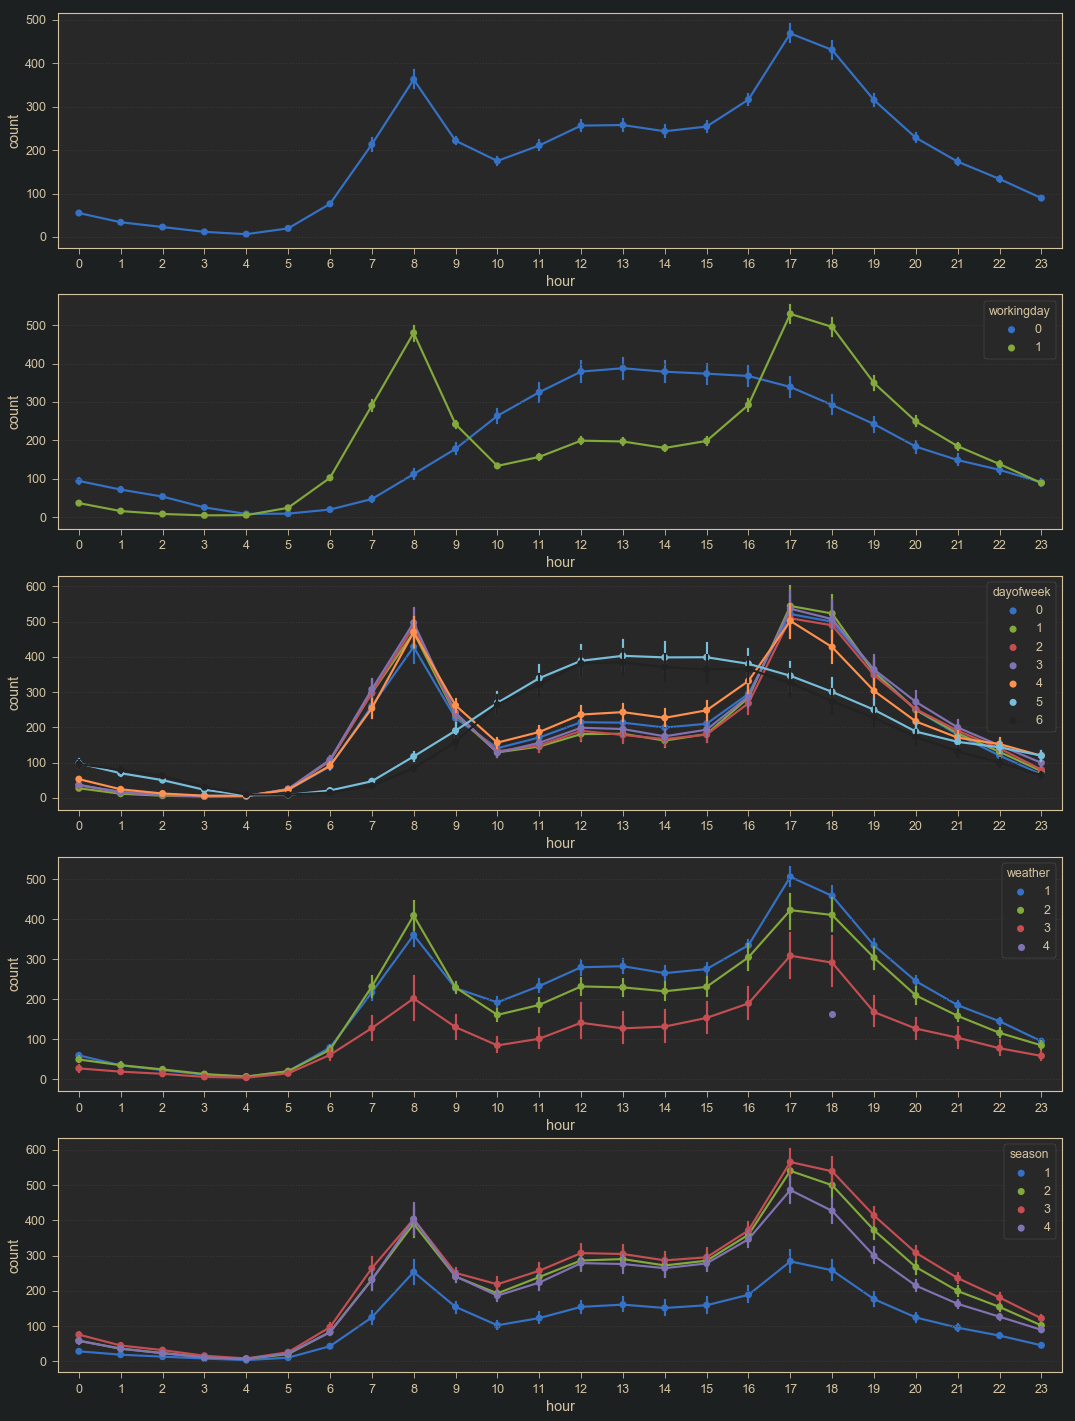

In [276]:
# 시간의 흐름에 따른 그래프 ( 0 ~ 23)
# 근무일의 여부에 따른 그래프 ( 0 ,1 )
# 요일에 따른 그래프 ( 0 - 6 )
# 계절에 따른 그래프 ( 1 - 4 )
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3) 
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)
# count = 4에 해당하는 폭우 번개 데이터 이상치 발견 
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5) 
# 색상이 자동으로 1 일 때 0 일떄 그래프 나누어채색됨 


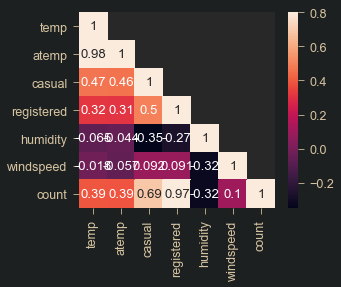

In [277]:
# 상관계수 구하기 ( Corelation )
train.columns
corrMatt=train[['temp', 'atemp', 'casual','registered','humidity','windspeed','count']]
corrMatt=corrMatt.corr()
mask=np.array(corrMatt)
mask
mask[np.tril_indices_from(mask)]=False
sns.heatmap(corrMatt, mask=mask, square=True, annot=True, vmax=0.8) 
# 한쪽 만 나오게하는 상수 역할 코드 


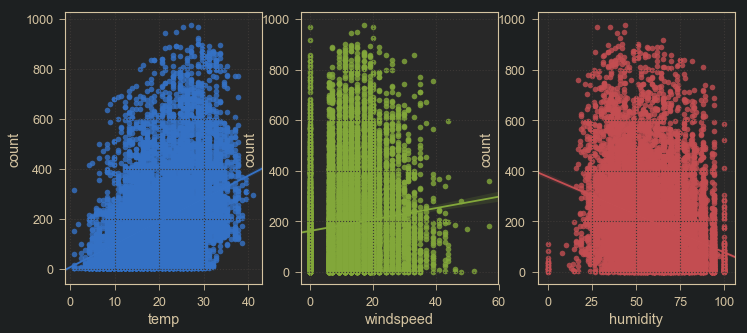

In [278]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x="temp", y="count", data=train, ax=ax1)
sns.regplot(x="windspeed", y="count", data=train, ax=ax2)
sns.regplot(x="humidity", y="count", data=train, ax=ax3)

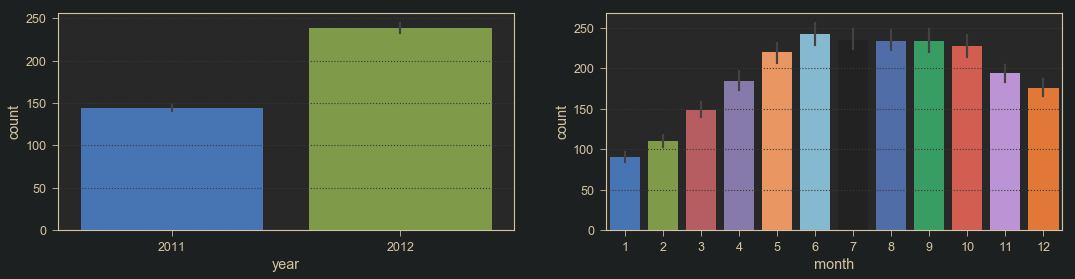

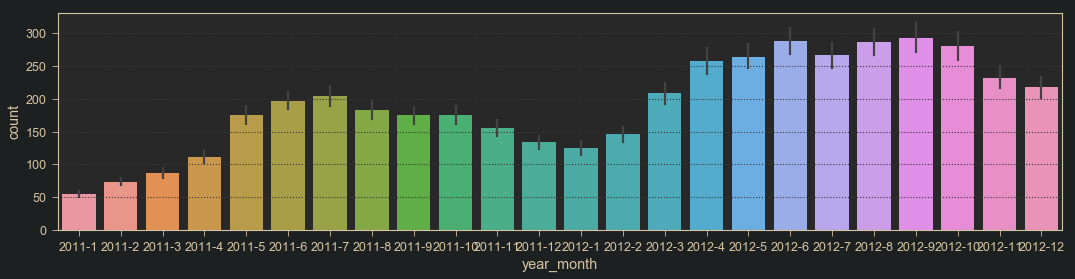

In [290]:
def cym(dtime): 
    return '{0}-{1}'.format(dtime.year,dtime.month)

train['year_month']=train['datetime'].apply(cym)
train['year_month']
fig, (ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(18,4)
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3=plt.subplots()
fig.set_size_inches(18,4)
sns.barplot(data=train, x='year_month', y='count', ax=ax3)
# 2011년이 2012보다 대여량이 많다 // 겨울보다 여름이 대여량 많다 


In [291]:
trainWithoutOutliers=train[np.abs(train['count']-train['count'].mean()) <= 3*train['count'].std()] #181*3
trainWithoutOutliers.shape
train.shape

(10886, 20)

In [292]:
train['count'].mean()

191.57413191254824

In [293]:
trainWithoutOutliers=train[np.abs(train['count']-train['count'].mean())\
                           <= 3*train['count'].std()]
trainWithoutOutliers.shape
train.shape
# False => 이 기준에 의한 outliar들 
# 주어진 숫자 절대값 연산 함수

(10886, 20)

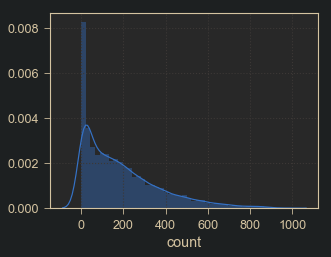

In [294]:
sns.distplot(train['count'])
# distplot을 사용하여 정규분포와 비교

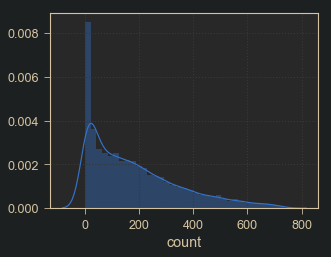

In [295]:
sns.distplot(trainWithoutOutliers['count'])
# y 축 : 밀도


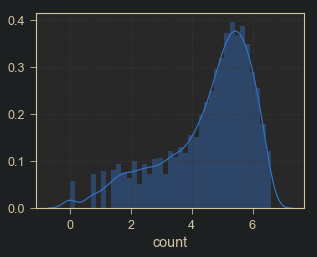

In [296]:
sns.distplot(np.log(trainWithoutOutliers['count']))
# 로그함수를 통한 데이터 재구조화
# Eda

In [297]:
# 랜덤포레스트 기반 예측 
train=pd.read_csv("data/data/bike/bike-sharing-demand/train.csv", parse_dates=['datetime'])
train.shape

(10886, 12)

In [323]:

# type(test['datetime'])
test=pd.read_csv('data/data/bike/bike-sharing-demand/test.csv', parse_dates=['datetime'])
test.shape


(6493, 9)

In [299]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape

type(train['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [300]:
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.day
test['hour']=test['datetime'].dt.hour
test['minute']=test['datetime'].dt.minute
test['second']=test['datetime'].dt.second
test['dayofweek']=test['datetime'].dt.dayofweek
test.shape



(6493, 16)

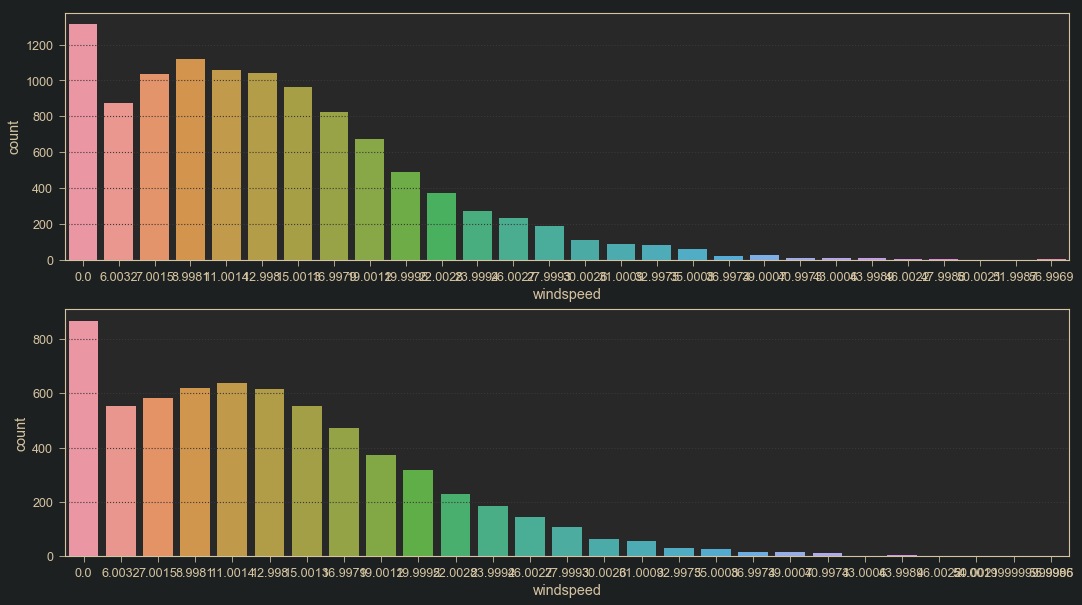

In [301]:
fig, axes=plt.subplots(nrows=2)
fig.set_size_inches(18,10)
sns.countplot(data=train, ax=axes[0], x='windspeed')
sns.countplot(data=test, ax=axes[1], x='windspeed')

In [302]:

# 풍속이 0 인 값을 일괄적으로 평균으로 대체 
# train.loc[train['windspeed']==0,'windspeed']=train['windspeed'].mean()
# test.loc[train['windspeed']==0,'windspeed']=test['windspeed'].mean()
# windspeed가 0 인값들 추출
# 해당 결측값들 평균으로 대체
#train.loc[train['windspeed']==0]
trainWind0=train.loc[train['windspeed']==0]
trainWindNot0=train.loc[train['windspeed']!=0]
#풍속0, 풍속이 0이 아닌것
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


In [303]:
from sklearn.ensemble import RandomForestClassifier # 이산형으로 도출

In [304]:
def predict_windspeed(data):    
    dataWind0=data.loc[data['windspeed']==0]
    dataWindNot0=data.loc[data['windspeed']!=0]
    wCol=['season', 'weather', 'humidity', 'month','temp', 'year', 'atemp']
    
    #풍속이 0이 아닌 데이터들의 타입을 str로 변경
    dataWindNot0['windspeed']=dataWindNot0['windspeed'].astype('str')
    
    rfModel_wind=RandomForestClassifier()
    rfModel_wind.fit(dataWindNot0[wCol],dataWindNot0['windspeed'])
    #풍속이 0이 아닌값으로 모델 생성
    #풍속이 0인 값들을 예측
    
    wind0Values=rfModel_wind.predict(X=dataWind0[wCol])
    
    predictWind0=dataWind0
    predictWindNot0=dataWindNot0
   
    predictWind0['windspeed']=wind0Values
    data=predictWindNot0.append(predictWind0)   
    data['windspeed']=data['windspeed'].astype('float')
    data.reset_index(inplace=True)
    return data


In [306]:
train=predict_windspeed(train) #위 생성함수 적용 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required.

In [307]:
train.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
1,10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5
2,11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5
3,12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5
4,13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5


In [308]:
print(train.shape)
train.info()

(10886, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
index         10886 non-null int64
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 1.7 MB


In [309]:
print(np.min(train['count'])) #1
print(np.max(train['count'])) #977
train.info()

1
977
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
index         10886 non-null int64
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 1.7 MB


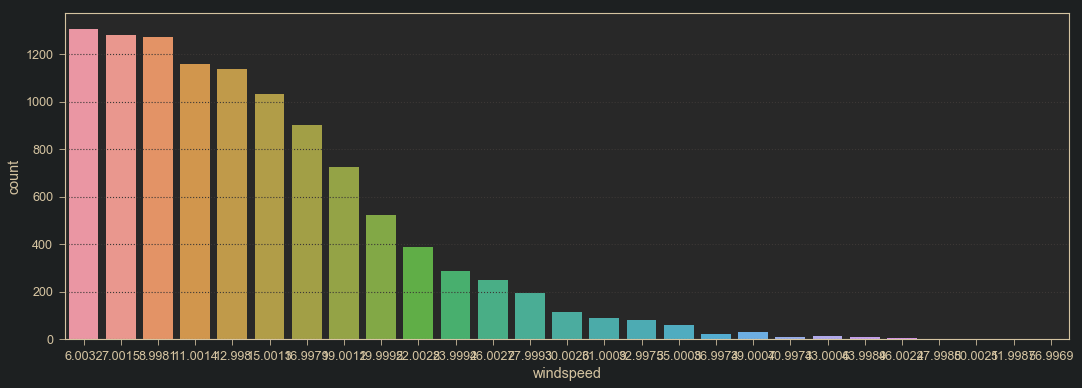

In [310]:
#x축은 풍속, y축은 count 트레인데이터 시각화
fig,ax1=plt.subplots()
fig.set_size_inches(18,6)
sns.countplot(data=train, x="windspeed", ax=ax1)

In [311]:
# 피처 선택
# 신호와 잡음 구분 
# 피처 다다익선 x 
# 피처를 하나씩 추가하면서 , 성능이 좋지 않은 피처 제거 
cfn=['season','holiday','workingday','weather',
     'dayofweek','year','month','hour']
train.info()
# 연속형 변수에서 범주형으로 타입 변경
# 연속형 변수 : 회귀문제와 같은 경우, 연속형변수 는 적절치않아 
# 1월달 + 1 이되버리면 안되듯이 
for var in cfn:
    train[var]=train[var].astype('category')
    test[var]=test[var].astype('category')
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
index         10886 non-null int64
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 1.7 MB


In [312]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100) 
# (, 전체 코어 다쓰기, tree개수) 
model
# model.fit(트레이닝x 트레이닝y)
# 예측
# 예측결과(count) = model.predict(test data 의 x)
# submission['count']=예측결과(count)
# 제출 => 등수 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [318]:
var_s=['a','b','c','d','e']
type(var_s)



list

In [340]:
# for var in var_s:
#     a=var_s[var].astype('category')
#     a
df=pd.DataFrame({'c1':['a','b','c'],
                 },
               index=['1','2','3'])
df

c1=['a','b','c']
c1

i2=['a','b','c']
for i in c1:
    df[i]=df[i].astype('category')
    
    
    

KeyError: 'a'